# **AI4DRM**: **Introdution to Neuralhydrology**
**Author**: **Siddik Barbhuiya**

**Email:**: siddikbarbhuiya@gmail.com

## Workshop Overview
This comprehensive workshop covers:
1. Understanding the CAMELS Dataset (Forcing & Attributes)
2. Exploring Available Models in NeuralHydrology
3. Single Basin Training, Validation & Evaluation
4. Multi-Basin Training, Validation & Evaluation

---


# Part 1: Understanding the CAMELS Dataset

## What is CAMELS?
CAMELS (Catchment Attributes and MEteorology for Large-sample Studies) is a standardized hydrological dataset containing:
- **Forcing (Dynamic) Data**: Time-series meteorological inputs
- **Static Attributes**: Catchment characteristics that don't change over time
- **Streamflow Observations**: Target variable for rainfall-runoff modeling

## A. Forcing Data (Dynamic Inputs)
These are the **time-varying** meteorological variables that drive the hydrological cycle.

### Available Forcing Products:
- **Daymet**: Daily surface weather data on a 1-km grid
- **Maurer**: 1/8° gridded meteorological forcing
- **Maurer Extended**: Maurer + additional variables
- **NLDAS**: North American Land Data Assimilation System
- **NLDAS Hourly**: High temporal resolution

### Common Forcing Variables:
| Variable | Unit | Description |
|----------|------|-------------|
| `prcp(mm/day)` | mm/day | Precipitation (rainfall + snowfall) |
| `tmax(C)` | °C | Maximum daily temperature |
| `tmin(C)` | °C | Minimum daily temperature |
| `srad(W/m2)` | W/m² | Solar radiation |
| `vp(Pa)` | Pa | Vapor pressure |
| `dayl(s)` | seconds | Day length |

## B. Static Attributes
These describe the **physical characteristics** of each catchment and remain constant over time. They are grouped into categories:

### 1. Topography (`camels_topo.txt`)
- `elev_mean`: Mean elevation (m)
- `slope_mean`: Mean slope (m/km)
- `area_gages2`: Catchment area (km²)

### 2. Climate (`camels_clim.txt`)
- `p_mean`: Mean daily precipitation (mm/day)
- `pet_mean`: Mean potential evapotranspiration (mm/day)
- `aridity`: Aridity index (PET/P)
- `frac_snow`: Fraction of precipitation falling as snow
- `high_prec_freq`, `high_prec_dur`: High precipitation frequency & duration

### 3. Soil (`camels_soil.txt`)
- `soil_depth_pelletier`: Depth to bedrock (m)
- `soil_porosity`: Volumetric porosity
- `soil_conductivity`: Saturated hydraulic conductivity (cm/hr)
- `sand_frac`, `silt_frac`, `clay_frac`: Soil texture fractions

### 4. Vegetation (`camels_vege.txt`)
- `frac_forest`: Forest fraction
- `lai_max`: Maximum Leaf Area Index
- `lai_diff`: Difference between max and min LAI
- `gvf_max`, `gvf_diff`: Green Vegetation Fraction

### 5. Geology (`camels_geol.txt`)
- `carbonate_rocks_frac`: Fraction of carbonate rocks
- `geol_permeability`: Subsurface permeability (m²)

### 6. Hydrology (`camels_hydro.txt`)
- `q_mean`: Mean discharge (mm/day)
- `runoff_ratio`: Runoff ratio (Q/P)
- `baseflow_index`: Baseflow index

---
**See the paper**


Newman, A. J., Clark, M. P., Sampson, K., Wood, A., Hay, L. E., Bock, A., Viger, R. J., Blodgett, D., Brekke, L., Arnold, J. R., Hopson, T., and Duan, Q.: Development of a large-sample watershed-scale hydrometeorological data set for the contiguous USA: data set characteristics and assessment of regional variability in hydrologic model performance, Hydrol. Earth Syst. Sci., 19, 209–223, https://doi.org/10.5194/hess-19-209-2015, 2015.

Mangukiya, N. K., Kumar, K. B., Dey, P., Sharma, S., Bejagam, V., Mujumdar, P. P., & Sharma, A. (2025). CAMELS-IND: hydrometeorological time series and catchment attributes for 228 catchments in Peninsular India. Earth System Science Data, 17(2), 461–491. https://doi.org/10.5194/essd-17-461-2025

# Part 2: Available Models in NeuralHydrology

NeuralHydrology provides a rich **Model Zoo** with state-of-the-art architectures:

## 1. Standard RNN Models
### `CudaLSTM`

### `CustomLSTM`
- Custom LSTM implementation with full control over cell operations

### `GRU`
- Gated Recurrent Unit (simpler than LSTM)

## 2. Enhanced LSTM Variants
### `EALSTM` (Entity-Aware LSTM)
- Incorporates **static attributes** via a special input gate

### `MCLSTM` (Mass-Conserving LSTM)
- Enforces **water balance** constraints

## 3. Multi-Timescale Models
### `MTSLSTM` (Multi-Timescale LSTM)
- Processes data at **multiple frequencies** (e.g., daily + hourly)

### `ODELSTM` (Neural ODE LSTM)
- Models irregular time steps using Neural ODEs

## 4. Attention-Based Models
### `Transformer`
- Self-attention mechanism for sequence modeling

## 5. Modern Architectures
### `Mamba`
- State Space Model (SSM) for efficient long-sequence modeling
### `XLSTM`
- Extended LSTM with modern improvements


## 6. Hybrid & Forecasting Models
### `HybridModel`
- Combines physical models with deep learning


### Forecasting Variants
- `SequentialForecastLSTM`: Sequential multi-step forecasting
- `MultiHeadForecastLSTM`: Multi-head attention for forecasting
- `StackedForecastLSTM`: Stacked architecture for forecasting

---


**See the papers:**

Barbhuiya, S., & Gupta, V. (2025). From gauged to ungauged: Large-scale deep learning rainfall-runoff modelling for reliable streamflow estimation in India’s diverse basins. Environmental Modelling & Software, 194, 106696. https://doi.org/10.1016/j.envsoft.2025.106696




# Part 3: Setup & Data Inspection


In [1]:
# Clone and install NeuralHydrology
!git clone https://github.com/neuralhydrology/neuralhydrology
%cd neuralhydrology
!pip install -e .


Cloning into 'neuralhydrology'...
remote: Enumerating objects: 2471, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 2471 (delta 58), reused 26 (delta 26), pack-reused 2387 (from 3)
Receiving objects: 100% (2471/2471), 11.66 MiB | 25.57 MiB/s, done.
Resolving deltas: 100% (1553/1553), done.
/content/neuralhydrology
Obtaining file:///content/neuralhydrology
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 25.4 MB/s eta 0:00:00
  Running setup.py develop for neuralhydrology


In [2]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torch
import yaml
from neuralhydrology.nh_run import start_run, eval_run

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


/content/neuralhydrology/neuralhydrology/datautils/utils.py:242: SyntaxWarning: invalid escape sequence '\d'
  weekly_freq = re.match('(\d+)W(-(MON|TUE|WED|THU|FRI|SAT|SUN))?$', native_frequency)
/content/neuralhydrology/neuralhydrology/datasetzoo/camelsus.py:184: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(fp, sep='\s+')
/content/neuralhydrology/neuralhydrology/datasetzoo/camelsus.py:220: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None, names=col_names)


Using device: cuda:0


## Inspect Forcing Data


/tmp/ipython-input-321009810.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(forcing_file, delim_whitespace=True, skiprows=3)


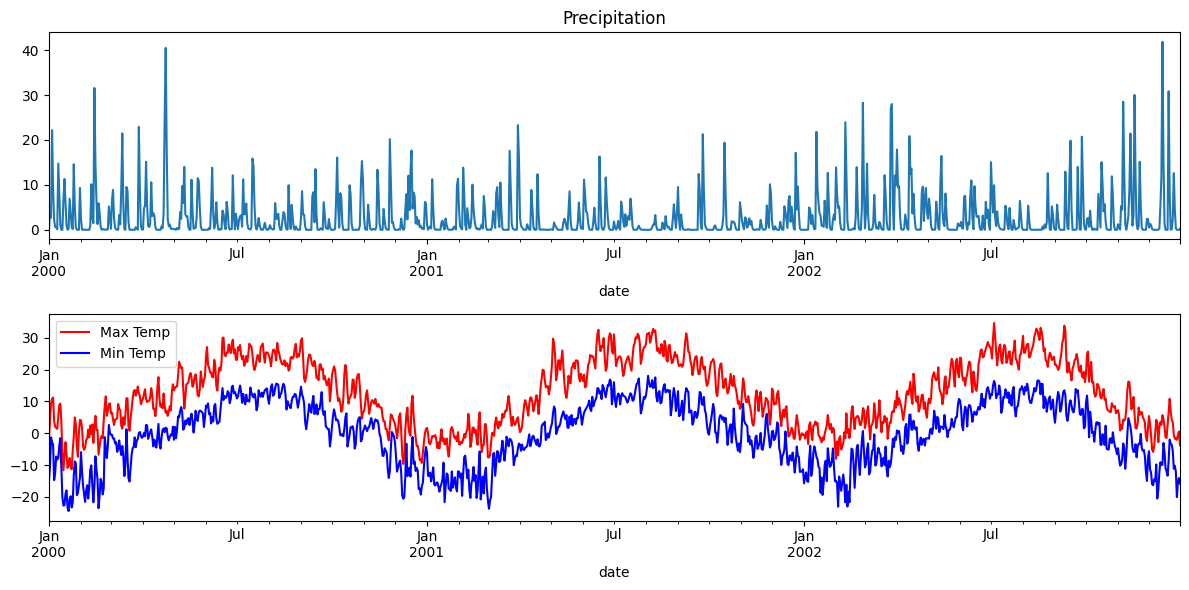

In [ ]:
data_dir = Path("test/test_data/camels_us")
basin_id = "01022500"
forcing_file = data_dir / f"basin_mean_forcing/maurer_extended/{basin_id}_lump_maurer_forcing_leap.txt"

if forcing_file.exists():
    df = pd.read_csv(forcing_file, delim_whitespace=True, skiprows=3)
    df['date'] = pd.to_datetime(df[['Year', 'Mnth', 'Day']].astype(str).agg('-'.join, axis=1))
    df = df.set_index('date')

    fig, ax = plt.subplots(2, 1, figsize=(12, 6))
    df['prcp(mm/day)'].plot(ax=ax[0], title='Precipitation')
    df['tmax(C)'].plot(ax=ax[1], label='Max Temp', color='red')
    df['tmin(C)'].plot(ax=ax[1], label='Min Temp', color='blue')
    ax[1].legend()
    plt.tight_layout()
    plt.show()


---
# Part 4: Single Basin Training, Validation & Evaluation

## Workflow Overview:
1. **Training**: Model learns from historical data (2000-2001)
2. **Validation**: Monitor performance on held-out period (2001-2002)
3. **Evaluation**: Final test on unseen data (2002)

## Create Configuration


In [ ]:
config = {
    'experiment_name': 'single_basin_run',
    'run_dir': 'runs',

    # Basin files
    'train_basin_file': 'test/test_data/1_basin_test_set.txt',
    'validation_basin_file': 'test/test_data/1_basin_test_set.txt',
    'test_basin_file': 'test/test_data/1_basin_test_set.txt',

    # Time periods
    'train_start_date': '01/10/2000',
    'train_end_date': '30/09/2006',
    'validation_start_date': '01/10/2008',
    'validation_end_date': '30/09/2010',
    'test_start_date': '01/10/2008',
    'test_end_date': '31/12/2016',

    # Hardware
    'device': device,

    # Validation settings
    'validate_every': 5,
    'validate_n_random_basins': 1,
    'metrics': ['NSE', 'KGE'],

    # Model architecture
    'model': 'cudalstm',
    'head': 'regression',
    'output_activation': 'linear',
    'hidden_size': 20,
    'initial_forget_bias': 3,
    'output_dropout': 0.4,

    # Training settings
    'optimizer': 'Adam',
    'loss': 'MSE',
    'learning_rate': {0: 1e-2, 10: 5e-3, 20: 1e-3},
    'batch_size': 256,
    'epochs': 30,
    'clip_gradient_norm': 1,

    # Sequence settings
    'predict_last_n': 1,
    'seq_length': 365,
    'num_workers': 2,
    'log_interval': 5,

    # Data settings
    'dataset': 'camels_us',
    'data_dir': 'test/test_data/camels_us',
    'forcings': 'maurer_extended',
    'dynamic_inputs': ['prcp(mm/day)', 'srad(W/m2)', 'tmax(C)', 'tmin(C)', 'vp(Pa)'],
    'target_variables': ['QObs(mm/d)'],
    'clip_targets_to_zero': ['QObs(mm/d)'],
    #'static_attributes': ['soil_depth_pelletier']
}

config_file = Path('single_basin_config.yml')
with open(config_file, 'w') as f:
    yaml.dump(config, f)

print(f"✓ Configuration saved to {config_file}")


✓ Configuration saved to single_basin_config.yml


## Run Training
**Note**: Training prints loss and validation metrics every 5 epochs.


In [ ]:
start_run(config_file=config_file)


# Validation: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


## Evaluate on Test Set


In [ ]:
single_run_dir = sorted(Path("runs").glob("single_basin_run_*"))[-1]
print(f"Evaluating: {single_run_dir}")
eval_run(run_dir=single_run_dir, period="test")


Evaluating: runs/single_basin_run_2611_130450
# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


## Visualize Results


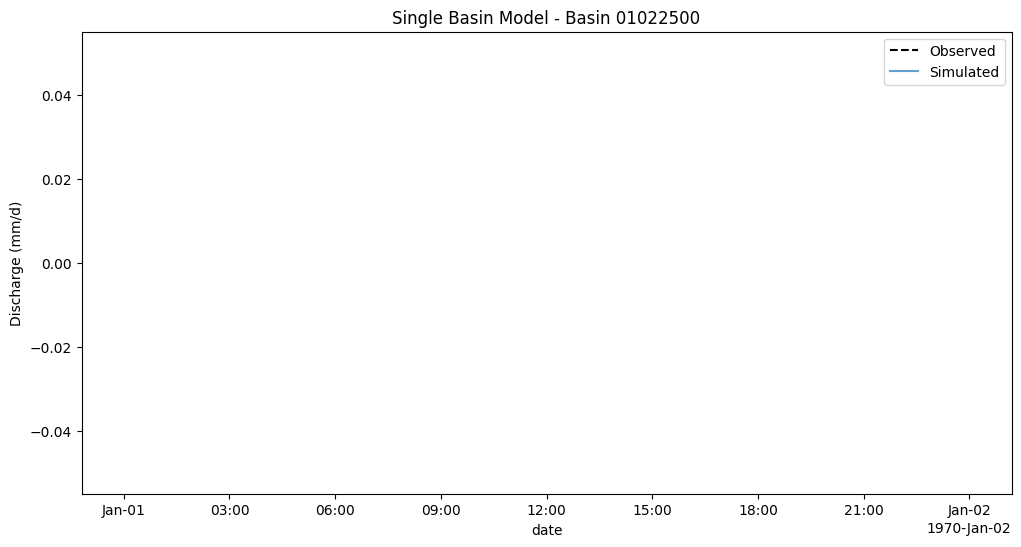

In [ ]:
import pickle

results_file = single_run_dir / "test" / "model_epoch030" / "test_results.p"
with open(results_file, "rb") as f:
    results = pickle.load(f)

basin_results = results[basin_id]['1D']['xr']

fig, ax = plt.subplots(figsize=(12, 6))
basin_results['QObs(mm/d)_obs'].plot(ax=ax, label='Observed', color='black', linestyle='--')
basin_results['QObs(mm/d)_sim'].plot(ax=ax, label='Simulated', alpha=0.7)
ax.set_title(f"Single Basin Model - Basin {basin_id}")
ax.set_ylabel("Discharge (mm/d)")
ax.legend()
plt.show()


---
# Part 5: Multi-Basin Training, Validation & Evaluation

## Why Multi-Basin Training?
Training on multiple basins allows the model to:
- **Generalize** across different hydrological regimes
- Learn **robust** rainfall-runoff relationships
- Leverage **static attributes** to distinguish basins

## Update Configuration for 4 Basins


In [ ]:
config['experiment_name'] = 'multi_basin_run'
config['train_basin_file'] = 'test/test_data/4_basins_test_set.txt'
config['validation_basin_file'] = 'test/test_data/4_basins_test_set.txt'
config['test_basin_file'] = 'test/test_data/4_basins_test_set.txt'

multi_config_file = Path('multi_basin_config.yml')
with open(multi_config_file, 'w') as f:
    yaml.dump(config, f)

print(f"✓ Multi-basin configuration saved to {multi_config_file}")


✓ Multi-basin configuration saved to multi_basin_config.yml


## Run Multi-Basin Training


In [ ]:
start_run(config_file=multi_config_file)


# Validation: 100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


## Evaluate Multi-Basin Model


In [ ]:
multi_run_dir = sorted(Path("runs").glob("multi_basin_run_*"))[-1]
print(f"Evaluating: {multi_run_dir}")
eval_run(run_dir=multi_run_dir, period="test")


Evaluating: runs/multi_basin_run_2611_130511
# Evaluation: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


## Compare Single vs Multi-Basin Performance


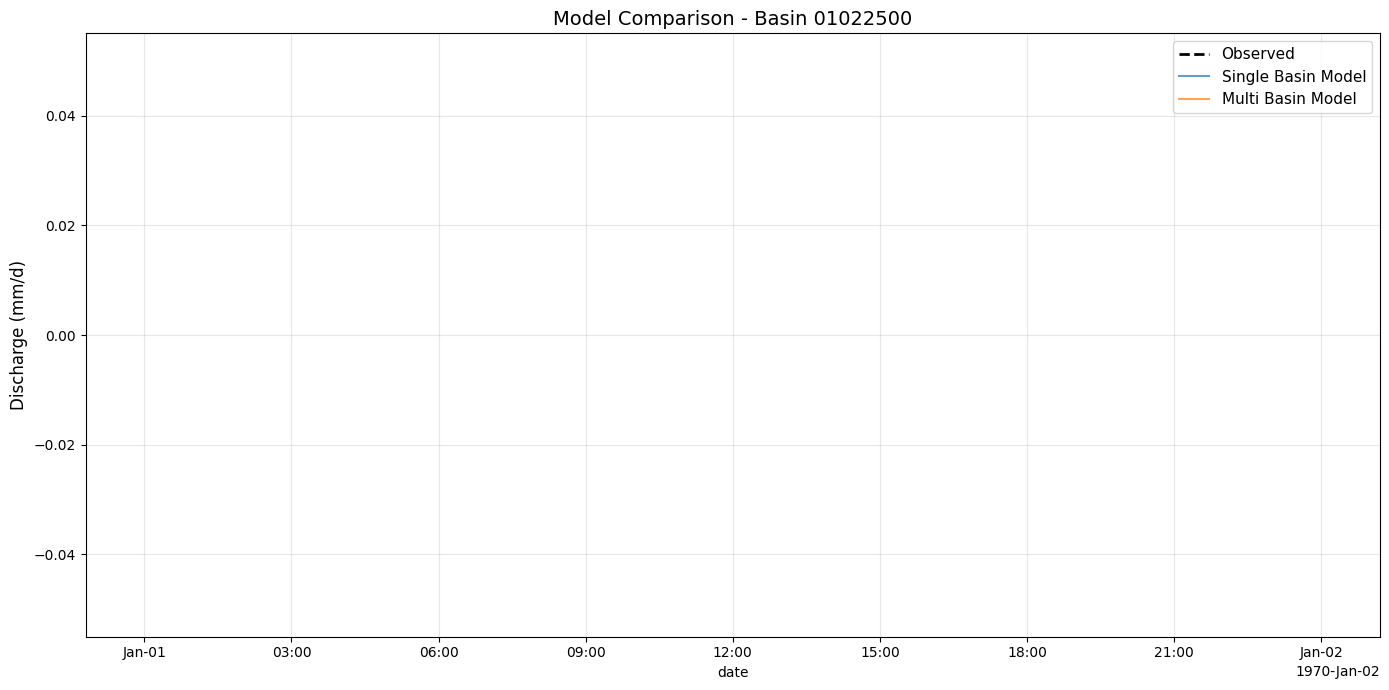

In [ ]:
# Load both results
def load_results(run_dir, basin_id):
    results_file = run_dir / "test" / "model_epoch030" / "test_results.p"
    with open(results_file, "rb") as f:
        results = pickle.load(f)
    return results[basin_id]['1D']['xr']

single_results = load_results(single_run_dir, basin_id)
multi_results = load_results(multi_run_dir, basin_id)

# Plot comparison
fig, ax = plt.subplots(figsize=(14, 7))
single_results['QObs(mm/d)_obs'].plot(ax=ax, label='Observed', color='black', linestyle='--', linewidth=2)
single_results['QObs(mm/d)_sim'].plot(ax=ax, label='Single Basin Model', alpha=0.7)
multi_results['QObs(mm/d)_sim'].plot(ax=ax, label='Multi Basin Model', alpha=0.7)

ax.set_title(f"Model Comparison - Basin {basin_id}", fontsize=14)
ax.set_ylabel("Discharge (mm/d)", fontsize=12)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()


---
# Summary

## What You Learned:
1. **CAMELS Data Structure**: Forcing (dynamic) vs Attributes (static)
2. **Model Zoo**: 15+ models from CudaLSTM to Transformer
3. **Single Basin Workflow**: Train → Validate → Evaluate
4. **Multi-Basin Workflow**: Generalization across catchments

## Next Steps:
- Experiment with different models (`EALSTM`, `Transformer`)
- Try different static attributes
- Scale to full CAMELS dataset (671 basins)
- Explore multi-timescale modeling with `MTSLSTM`
